In [1]:
import pandas as pd
import folium
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)

In [2]:
data = pd.read_csv('trip_en.csv')

/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (43,44,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data

TripID  UserID  PurposeID  Purpose        DepartureTime  \
0       40509    4681        300     home  2018-08-27 17:27:17   
1       40515    4683        300     home  2018-08-27 18:14:20   
2       40516    4687        300     home  2018-08-27 19:25:54   
3       40519    4686        501    other  2018-08-27 16:36:20   
4       40525    4684        200  Working  2018-08-28 07:03:26   
...       ...     ...        ...      ...                  ...   
12227   83142    4700        501    other  2018-12-28 12:20:57   
12228   83269    4700        501    other  2018-12-29 08:57:06   
12229   83334    4700        999       --  2018-12-30 13:01:08   
12230   83371    4700        999       --  2018-12-31 11:38:18   
12231   83492    4684        300     home  2018-12-29 03:40:53   

               ArrivalTime  TripTime  Validity  MainTransportationCode  \
0      2018-08-27 19:23:38      6981         1                   100.0   
1      2018-08-27 21:07:30     10390         1                   101.0   
2      2018-08-27 21:10:00      6246         1                   100.0   
3      2018-08-27 22:10:14     20034         1                   201.0   
4      2018-08-28 07:26:39      1393         1                   300.0   
...                    ...       ...       ...                     ...   
12227  2018-12-28 17:30:47     18590         1                   101.0   
12228  2018-12-29 11:15:55      8329         1                   101.0   
12229  2018-12-30 17:40:25     16757         1                   101.0   
12230  2018-12-31 13:32:47      6869         1                   101.0   
12231  2019-01-05 15:14:37    646424         1                   500.0   

      MainTransportation  TransportationCode Transportation  \
0                  train               101.0         subway   
1                 subway               101.0         subway   
2                  train               100.0          train   
3                    bus               201.0            bus   
4                    car               300.0            car   
...                  ...                 ...            ...   
12227             subway               201.0            bus   
12228             subway               101.0         subway   
12229             subway               201.0            bus   
12230             subway               500.0           walk   
12231               walk               500.0           walk   

       TransportationChange1_CD TransportationChange1_name  \
0                         500.0                       walk   
1                         500.0                       walk   
2                           NaN                        NaN   
3                           NaN                        NaN   
4                         300.0                        car   
...                         ...                        ...   
12227                     101.0                     subway   
12228                     201.0                        bus   
12229                     101.0                     subway   
12230                     101.0                     subway   
12231                       NaN                        NaN   

      TransportationChange1_time  TransportationChange2_CD  \
0            2018-08-27 17:27:34                     101.0   
1            2018-08-27 18:52:52                     999.0   
2                            NaN                       NaN   
3                            NaN                       NaN   
4            2018-08-28 07:26:33                       NaN   
...                          ...                       ...   
12227        2018-10-19 18:01:34                     500.0   
12228        2018-10-22 08:07:33                       NaN   
12229        2018-10-22 18:40:45                     500.0   
12230        2018-10-23 07:30:04                     201.0   
12231                        NaN                       NaN   

      TransportationChange2_name TransportationChange2_time  \
0              

In [4]:
len(data)

12232

# 0. はじめに

豊洲でのMaaS導入による政策評価を最終目標とする。

そのため豊洲の範囲をまず指定し、データを以下の３パターンに分けた。
- 豊洲を目的地とするトリップ
- 豊洲を出発地とするトリップ
- 豊洲の内々トリップ

また、それぞれのデータついて以下のような分析を行った。
- アクティビティパターン

ある個人の一日のトリップ目的の連なり。例えば、会社へ通勤して帰宅する場 合のアクティビティパターンは「通勤-帰宅」、帰宅途中に買い物などの寄り道 をする場合は「通勤-買い物-帰宅」となる
- モードチェーン

出発地から目的地までに使用する交通手段の連なり。


# 1. 緯度経度の準備

### y=mx+n

In [5]:
def makeLinearEquation(x1, y1, x2, y2):
    line = {}
    if y1 == y2:
        # y軸に平行な直線
        line["y"] = y1
    elif x1 == x2:
        # x軸に平行な直線
        line["x"] = x1
    else:
        # y = mx + n
        line["m"] = (y1 - y2) / (x1 - x2)
        line["n"] = y1 - (line["m"] * x1)
    return line

### Lat がx軸で　Lonがy軸です。

### ポイントを示す

In [6]:
pointA = (35.654994,139.764976)
pointB =(35.547032,139.835872)
pointC = (35.671242,139.846172)
pointD = (35.678145,139.789352)

In [72]:
latitude = (35.678145+35.547032)/2
longtude = (139.764976+139.846172)/2

 
map = folium.Map(location=[latitude, longtude], zoom_start=12)
folium.Marker(location=[pointA[0], pointA[1]]).add_to(map)
folium.Marker(location=[pointB[0], pointB[1]]).add_to(map)
folium.Marker(location=[pointC[0], pointC[1]]).add_to(map)
folium.Marker(location=[pointD[0], pointD[1]]).add_to(map)

In [73]:
map

<img src="map.png">

In [7]:
LineAB = makeLinearEquation(pointA[1],pointA[0], pointB[1],pointB[0])
LineBC = makeLinearEquation(pointB[1],pointB[0], pointC[1],pointC[0])
LineCD = makeLinearEquation(pointC[1],pointC[0], pointD[1],pointD[0])
LineDA = makeLinearEquation(pointD[1],pointD[0], pointA[1],pointA[0])


In [8]:
def under(Line, Lon, Lat):
    if Lon < Line['m'] * Lat + Line['n']:
        return True
    else:
        return False


In [9]:
def upper(Line,Lon,Lat):
    if Lon > Line['m'] * Lat + Line['n']:
        return True
    else:
        return False

# 2.a目的地が範囲のデータを取り出す

In [10]:
data = data.replace(np.NAN, '--')

In [11]:
lis_index = []
for i in range(len(data)):
    lis_index.append(upper(LineAB,data.LonD[i],data.LatD[i])& under(LineCD,data.LonD[i],data.LatD[i]) & upper(LineBC,data.LonD[i],data.LatD[i]) & under(LineDA,data.LonD[i],data.LatD[i]))

In [12]:
data_toToyosu = data[lis_index]

In [13]:
#new_data.to_csv('new_data.csv')

In [14]:
data_toToyosu = data_toToyosu.reset_index(drop=True)

In [15]:
data_toToyosu

TripID  UserID  PurposeID      Purpose        DepartureTime  \
0      40515    4683        300         home  2018-08-27 18:14:20   
1      40519    4686        501        other  2018-08-27 16:36:20   
2      40526    4681        100  Work/School  2018-08-28 06:12:23   
3      40558    4683        300         home  2018-08-28 19:32:16   
4      40567    4681        100  Work/School  2018-08-29 06:12:02   
...      ...     ...        ...          ...                  ...   
5374   83142    4700        501        other  2018-12-28 12:20:57   
5375   83269    4700        501        other  2018-12-29 08:57:06   
5376   83334    4700        999           --  2018-12-30 13:01:08   
5377   83371    4700        999           --  2018-12-31 11:38:18   
5378   83492    4684        300         home  2018-12-29 03:40:53   

              ArrivalTime  TripTime  Validity MainTransportationCode  \
0     2018-08-27 21:07:30     10390         1                    101   
1     2018-08-27 22:10:14     20034         1                    201   
2     2018-08-28 07:38:48      5185         1                    100   
3     2018-08-28 21:47:41      8125         1                    101   
4     2018-08-29 07:38:43      5201         1                    101   
...                   ...       ...       ...                    ...   
5374  2018-12-28 17:30:47     18590         1                    101   
5375  2018-12-29 11:15:55      8329         1                    101   
5376  2018-12-30 17:40:25     16757         1                    101   
5377  2018-12-31 13:32:47      6869         1                    101   
5378  2019-01-05 15:14:37    646424         1                    500   

     MainTransportation TransportationCode Transportation  \
0                subway                101         subway   
1                   bus                201            bus   
2                 train                500           walk   
3                subway                101         subway   
4                subway                400           bike   
...                 ...                ...            ...   
5374             subway                201            bus   
5375             subway                101         subway   
5376             subway                201            bus   
5377             subway                500           walk   
5378               walk                500           walk   

     TransportationChange1_CD TransportationChange1_name  \
0                         500                       walk   
1                          --                         --   
2                         201                        bus   
3                         500                       walk   
4                         500                       walk   
...                       ...                        ...   
5374                      101                     subway   
5375                      201                        bus   
5376                      101                     subway   
5377                      101                     subway   
5378                       --                         --   

     TransportationChange1_time TransportationChange2_CD  \
0           2018-08-27 18:52:52                      999   
1                            --                       --   
2           2018-08-28 06:15:43                      100   
3           2018-08-28 19:40:25                       --   
4           2018-08-29 07:06:13                      101   
...                         ...                      ...   
5374        2018-10-19 18:01:34                      500   
5375        2018-10-22 08:07:33                       --   
5376        2018-10-22 18:40:45                      500   
5377        2018-10-23 07:30:04                      201   
5378                         --                       --   

     TransportationChange2_name TransportationChange2_time  \
0                            --        2018-08-27 21:07:25   
1            

# 2.b出発地が指定範囲のデータを取り出す

In [17]:
lis_index = []
for i in range(len(data)):
    lis_index.append(upper(LineAB,data.LonO[i],data.LatO[i])& under(LineCD,data.LonO[i],data.LatO[i]) & upper(LineBC,data.LonO[i],data.LatO[i]) & under(LineDA,data.LonO[i],data.LatO[i]))

In [18]:
data_fromToyosu = data[lis_index]

In [19]:
data_fromToyosu = data_fromToyosu.reset_index(drop=True)

In [20]:
data_toToyosu

TripID  UserID  PurposeID      Purpose        DepartureTime  \
0      40515    4683        300         home  2018-08-27 18:14:20   
1      40519    4686        501        other  2018-08-27 16:36:20   
2      40526    4681        100  Work/School  2018-08-28 06:12:23   
3      40558    4683        300         home  2018-08-28 19:32:16   
4      40567    4681        100  Work/School  2018-08-29 06:12:02   
...      ...     ...        ...          ...                  ...   
5374   83142    4700        501        other  2018-12-28 12:20:57   
5375   83269    4700        501        other  2018-12-29 08:57:06   
5376   83334    4700        999           --  2018-12-30 13:01:08   
5377   83371    4700        999           --  2018-12-31 11:38:18   
5378   83492    4684        300         home  2018-12-29 03:40:53   

              ArrivalTime  TripTime  Validity MainTransportationCode  \
0     2018-08-27 21:07:30     10390         1                    101   
1     2018-08-27 22:10:14     20034         1                    201   
2     2018-08-28 07:38:48      5185         1                    100   
3     2018-08-28 21:47:41      8125         1                    101   
4     2018-08-29 07:38:43      5201         1                    101   
...                   ...       ...       ...                    ...   
5374  2018-12-28 17:30:47     18590         1                    101   
5375  2018-12-29 11:15:55      8329         1                    101   
5376  2018-12-30 17:40:25     16757         1                    101   
5377  2018-12-31 13:32:47      6869         1                    101   
5378  2019-01-05 15:14:37    646424         1                    500   

     MainTransportation TransportationCode Transportation  \
0                subway                101         subway   
1                   bus                201            bus   
2                 train                500           walk   
3                subway                101         subway   
4                subway                400           bike   
...                 ...                ...            ...   
5374             subway                201            bus   
5375             subway                101         subway   
5376             subway                201            bus   
5377             subway                500           walk   
5378               walk                500           walk   

     TransportationChange1_CD TransportationChange1_name  \
0                         500                       walk   
1                          --                         --   
2                         201                        bus   
3                         500                       walk   
4                         500                       walk   
...                       ...                        ...   
5374                      101                     subway   
5375                      201                        bus   
5376                      101                     subway   
5377                      101                     subway   
5378                       --                         --   

     TransportationChange1_time TransportationChange2_CD  \
0           2018-08-27 18:52:52                      999   
1                            --                       --   
2           2018-08-28 06:15:43                      100   
3           2018-08-28 19:40:25                       --   
4           2018-08-29 07:06:13                      101   
...                         ...                      ...   
5374        2018-10-19 18:01:34                      500   
5375        2018-10-22 08:07:33                       --   
5376        2018-10-22 18:40:45                      500   
5377        2018-10-23 07:30:04                      201   
5378                         --                       --   

     TransportationChange2_name TransportationChange2_time  \
0                            --        2018-08-27 21:07:25   
1            

# 2.c指定範囲の内々トリップデータを取り出す

In [22]:
lis_index = []
for i in range(len(data)):
    lis_index.append(upper(LineAB,data.LonO[i],data.LatO[i])& under(LineCD,data.LonO[i],data.LatO[i]) & upper(LineBC,data.LonO[i],data.LatO[i]) & under(LineDA,data.LonO[i],data.LatO[i])&upper(LineAB,data.LonD[i],data.LatD[i])& under(LineCD,data.LonD[i],data.LatD[i]) & upper(LineBC,data.LonD[i],data.LatD[i]) & under(LineDA,data.LonD[i],data.LatD[i]))

In [23]:
data_fromToyosu_toToyosu = data[lis_index]

In [24]:
data_fromToyosu_toToyosu = data_fromToyosu_toToyosu.reset_index(drop=True)

In [25]:
data_fromToyosu_toToyosu

TripID  UserID  PurposeID      Purpose        DepartureTime  \
0      40515    4683        300         home  2018-08-27 18:14:20   
1      40558    4683        300         home  2018-08-28 19:32:16   
2      40580    4683        200      Working  2018-08-29 15:25:59   
3      40582    4700        300         home  2018-08-29 18:12:03   
4      40604    4697        200      Working  2018-08-30 08:07:12   
...      ...     ...        ...          ...                  ...   
3399   82956    4958        100  Work/School  2018-12-28 07:20:32   
3400   83142    4700        501        other  2018-12-28 12:20:57   
3401   83269    4700        501        other  2018-12-29 08:57:06   
3402   83334    4700        999           --  2018-12-30 13:01:08   
3403   83371    4700        999           --  2018-12-31 11:38:18   

              ArrivalTime  TripTime  Validity MainTransportationCode  \
0     2018-08-27 21:07:30     10390         1                    101   
1     2018-08-28 21:47:41      8125         1                    101   
2     2018-08-29 19:13:30     13651         1                    100   
3     2018-08-29 19:42:50      5447         1                    300   
4     2018-08-30 08:48:46      2494         1                    500   
...                   ...       ...       ...                    ...   
3399  2018-12-28 07:50:31      1799         1                    101   
3400  2018-12-28 17:30:47     18590         1                    101   
3401  2018-12-29 11:15:55      8329         1                    101   
3402  2018-12-30 17:40:25     16757         1                    101   
3403  2018-12-31 13:32:47      6869         1                    101   

     MainTransportation TransportationCode Transportation  \
0                subway                101         subway   
1                subway                101         subway   
2                 train                100          train   
3                   car                600       airplane   
4                  walk                500           walk   
...                 ...                ...            ...   
3399             subway                101         subway   
3400             subway                201            bus   
3401             subway                101         subway   
3402             subway                201            bus   
3403             subway                500           walk   

     TransportationChange1_CD TransportationChange1_name  \
0                         500                       walk   
1                         500                       walk   
2                         500                       walk   
3                         300                        car   
4                         999                         --   
...                       ...                        ...   
3399                       --                         --   
3400                      101                     subway   
3401                      201                        bus   
3402                      101                     subway   
3403                      101                     subway   

     TransportationChange1_time TransportationChange2_CD  \
0           2018-08-27 18:52:52                      999   
1           2018-08-28 19:40:25                       --   
2           2018-08-29 19:05:25                       --   
3           2018-09-03 12:19:35                       --   
4           2018-09-11 08:10:05                      500   
...                         ...                      ...   
3399                         --                       --   
3400        2018-10-19 18:01:34                      500   
3401        2018-10-22 08:07:33                       --   
3402        2018-10-22 18:40:45                      500   
3403        2018-10-23 07:30:04                      201   

     TransportationChange2_name TransportationChange2_time  \
0                            --        2018-08-27 21:07:25   
1            

In [26]:
#data_fromToyosu_toToyosu.to_csv('data_fromToyosu_toToyosu.csv')

# 3.トリップチェーン分析

## 3.a 目的地が範囲のデータ

In [30]:
colums = ['Transportation','TransportationChange1_name','TransportationChange2_name','TransportationChange3_name','TransportationChange4_name','TransportationChange5_name']

In [31]:
def TripChain(df):
    Lis = []
    lis = []
    for i in range(len(df)):
        for colum in colums:
            lis.append(df.iloc[i][colum])
        Lis.append(lis)
        lis =[]
        
    TripChain = pd.DataFrame(Lis).fillna('--')
    display(len(TripChain))
    display(len(TripChain.drop_duplicates()))
    return pd.DataFrame(TripChain.groupby(TripChain.columns.tolist(),as_index=False).size())

In [32]:
a = TripChain(data_toToyosu)

5379

319

In [33]:
#a.to_csv('data_toToyosu.csv')

In [34]:
TripChain_toToyosu = pd.read_csv('data_toToyosu.csv')

In [35]:
TripChain_toToyosu

0       1       2      3       4   5  \
0      walk      --      --     --      --  --   
1      bike      --      --     --      --  --   
2      walk  subway    walk     --      --  --   
3       car      --      --     --      --  --   
4    subway      --      --     --      --  --   
..      ...     ...     ...    ...     ...  ..   
314    walk   train    walk   taxi    walk  --   
315    walk   train    walk  train      --  --   
316    walk    walk  subway  train    walk  --   
317    walk    walk  subway   walk  subway  --   
318    walk    walk   train     --      --  --   

                           TripChain  Value  
0                walk,--,--,--,--,--   1477  
1                bike,--,--,--,--,--    452  
2          walk,subway,walk,--,--,--    432  
3                 car,--,--,--,--,--    290  
4              subway,--,--,--,--,--    223  
..                               ...    ...  
314     walk,train,walk,taxi,walk,--      1  
315      walk,train,walk,train,--,--      1  
316   walk,walk,subway,train,walk,--      1  
317  walk,walk,subway,walk,subway,--      1  
318         walk,walk,train,--,--,--      1  

[319 rows x 8 columns]

##### 上位nパターンを図示

In [36]:
def plot_TripChain(df, n, use_walk):
    sns.set()
    if use_walk:
        x = np.array(df['TripChain'][:n])
        y = np.array(df['Value'][:n])
    else:
        x = np.array(df['TripChain'][1:n])
        y = np.array(df['Value'][1:n])

    x_position = np.arange(len(x))

    fig = plt.figure()
    plt.xticks(rotation=45)
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(x_position, y, tick_label=x)
    ax.set_xlabel('TripChain')
    ax.set_ylabel('frequency')
    fig.show()

/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


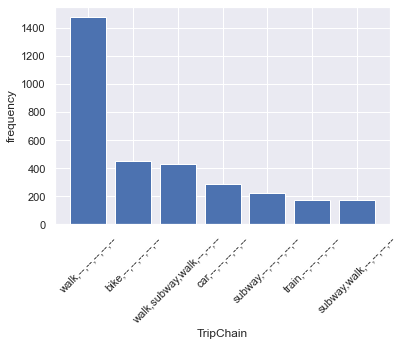

In [37]:
plot_TripChain(TripChain_toToyosu, n = 7, use_walk=True)

/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


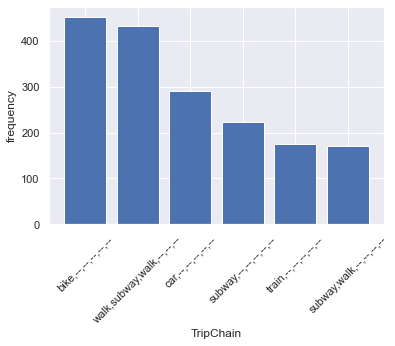

In [38]:
plot_TripChain(TripChain_toToyosu, n= 7, use_walk=False)

## 3.b 出発地が範囲のデータ

In [39]:
a = TripChain(data_fromToyosu)

5299

311

In [40]:
#a.to_csv('data_fromToyosu.csv')

In [41]:
TripChain_fromToyosu = pd.read_csv('data_fromToyosu.csv')

In [42]:
TripChain_fromToyosu

0       1       2     3     4   5                    TripChain  \
0      walk      --      --    --    --  --          walk,--,--,--,--,--   
1      walk  subway    walk    --    --  --    walk,subway,walk,--,--,--   
2      bike      --      --    --    --  --          bike,--,--,--,--,--   
3       car      --      --    --    --  --           car,--,--,--,--,--   
4    subway      --      --    --    --  --        subway,--,--,--,--,--   
..      ...     ...     ...   ...   ...  ..                          ...   
306    walk    tram      --    --    --  --        walk,tram,--,--,--,--   
307    walk    tram    walk   bus    --  --     walk,tram,walk,bus,--,--   
308    walk    walk     bus  walk  walk  --   walk,walk,bus,walk,walk,--   
309    walk    walk  subway  walk    --  --  walk,walk,subway,walk,--,--   
310    walk    walk   train   bus  walk  --  walk,walk,train,bus,walk,--   

     Value  
0     1481  
1      462  
2      442  
3      265  
4      216  
..     ...  
306      1  
307      1  
308      1  
309      1  
310      1  

[311 rows x 8 columns]

##### 上位nパターンを図示

/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


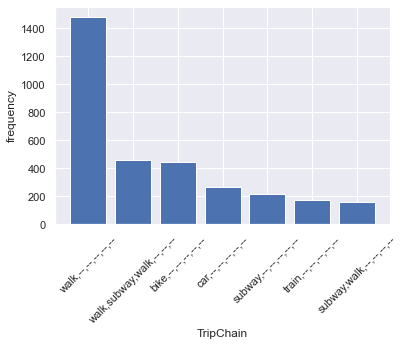

In [43]:
plot_TripChain(TripChain_fromToyosu, n = 7, use_walk=True)

/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


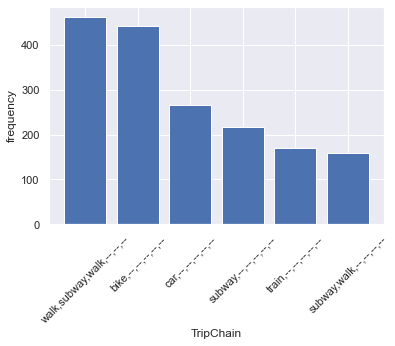

In [44]:
plot_TripChain(TripChain_fromToyosu, n = 7, use_walk=False)

## 3.c 指定範囲の内々トリップデータ

In [45]:
a = TripChain(data_fromToyosu_toToyosu)

3404

227

In [46]:
#a.to_csv('data_fromToyosu_toToyosu.csv')

In [47]:
TripChain_fromToyosu_toToyosu = pd.read_csv('data_fromToyosu_toToyosu.csv')

In [48]:
TripChain_fromToyosu_toToyosu

0       1     2       3     4   5                      TripChain  \
0      walk      --    --      --    --  --            walk,--,--,--,--,--   
1      bike      --    --      --    --  --            bike,--,--,--,--,--   
2      walk  subway  walk      --    --  --      walk,subway,walk,--,--,--   
3       car      --    --      --    --  --             car,--,--,--,--,--   
4    subway      --    --      --    --  --          subway,--,--,--,--,--   
..      ...     ...   ...     ...   ...  ..                            ...   
222    walk   train  walk  subway    --  --   walk,train,walk,subway,--,--   
223    walk   train  walk    taxi    --  --     walk,train,walk,taxi,--,--   
224    walk   train  walk   train    --  --    walk,train,walk,train,--,--   
225    walk   train  walk   train  walk  --  walk,train,walk,train,walk,--   
226    walk    tram    --      --    --  --          walk,tram,--,--,--,--   

     Value  
0     1141  
1      329  
2      247  
3      174  
4      155  
..     ...  
222      1  
223      1  
224      1  
225      1  
226      1  

[227 rows x 8 columns]

##### 上位nパターンを図示

/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


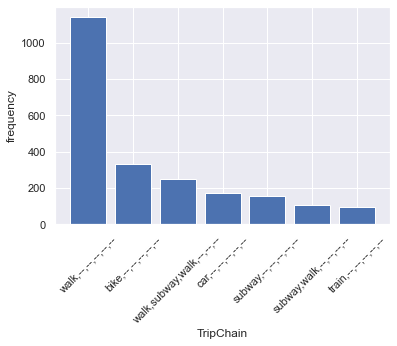

In [49]:
plot_TripChain(TripChain_fromToyosu_toToyosu, n = 7, use_walk= True)

/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


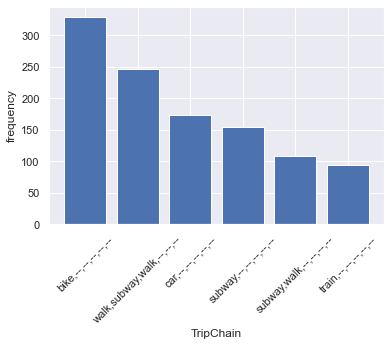

In [50]:
plot_TripChain(TripChain_fromToyosu_toToyosu, n = 7, use_walk= False)

# 4. ModeChain

In [51]:
def ModeChain(df1):
    user_list = df1["UserID"].unique()
    user_list =  np.sort(user_list)
    list_daytime = []
    for index, row in df1.iterrows():
        list_daytime.append(datetime.datetime.strptime(row["DepartureTime"], '%Y-%m-%d %H:%M:%S'))
    df1["daytime"] = list_daytime
    day = datetime.datetime(2018,8,27)# 初日
    day_index_list = []
    while True:
        day_index_list.append(day.strftime('%Y-%m-%d'))
        if day == datetime.datetime(2018,12,31): break#最後の日まで
        day += datetime.timedelta(days=1)

    df4 = pd.DataFrame([],index=day_index_list)#空
    # display(df4)

    for user in user_list:
        df2 = df1[df1["UserID"]==user]
        atcivity_list = []
        day = datetime.datetime(2018,8,27)
        while True:
            df3 = df2[(df2["daytime"] >= day)&(df2["daytime"] <= day+datetime.timedelta(days=1))]#その日を取り出す
            atcivity_list.append("->".join(list(df3["Purpose"])))
            if day == datetime.datetime(2018,12,31): break
            day += datetime.timedelta(days=1) 
        df4[user] = atcivity_list
    df5 = pd.Series( df4.values.reshape([-1]) )#短冊切って一列に
    act_pat_df = df5.value_counts()
    act_pat_df.index.name="activity_pattern"
    act_pat_df = act_pat_df.reset_index()
    act_pat_df["index"] = range(len(act_pat_df))
    act_pat_df = act_pat_df.set_index("index")
    act_pat_df = act_pat_df.rename(columns={0: 'num'})#名前をつけただけ
    return act_pat_df.drop(0)

## 4.a　目的地が範囲のデータ

In [52]:
ModeChain_toToyosu = ModeChain(data_toToyosu)

In [53]:
ModeChain_toToyosu

activity_pattern   num
index                                                         
1                                            Work/School  1240
2                                                   home   602
3                                      Work/School->home   260
4                                         Shopping->home   111
5                                                Working    94
...                                                  ...   ...
345    Work/School->Working->AfterWork/School->Shoppi...     1
346                        Work/School->Working->Working     1
347              Work/School->Shopping->Working-> Eating     1
348                                        other->Pickup     1
349                                 Work/School->Walking     1

[349 rows x 2 columns]

In [54]:
def plot_TripChain(df, n):
    sns.set()

    x = np.array(df['activity_pattern'][:n])
    y = np.array(df['num'][:n])

    x_position = np.arange(len(x))

    fig = plt.figure()
    plt.xticks(rotation=45)
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(x_position, y, tick_label=x)
    ax.set_xlabel('activity_pattern')
    ax.set_ylabel('frequency')
    fig.show()

/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


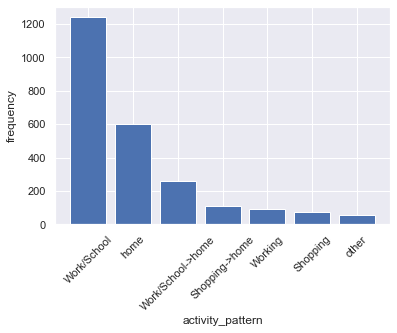

In [55]:
plot_TripChain(ModeChain_toToyosu,n = 7)

## 4. b 出発地が範囲のデータ

In [56]:
ModeChain_fromToyosu = ModeChain(data_fromToyosu)

In [57]:
ModeChain_fromToyosu

activity_pattern  num
index                                                        
1                                                   home  835
2                                            Work/School  523
3                                      Work/School->home  329
4                                               Shopping  128
5                                                Working  127
...                                                  ...  ...
370     Eating->Amusement->Shopping->home->Shopping->...    1
371                                      Shopping->other    1
372                              home->Work/School->home    1
373                    Eating->AfterWork/School-> Eating    1
374                                       Pickup->Lesson    1

[374 rows x 2 columns]

/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


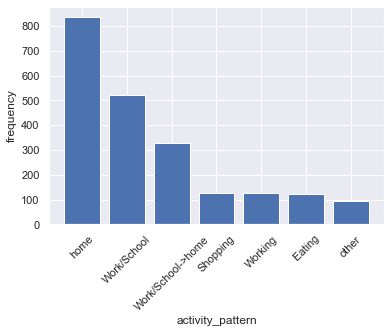

In [58]:
plot_TripChain(ModeChain_fromToyosu,n = 7)

## 4. c 内々トリップ

In [59]:
ModeChain_fromToyosu_toToyosu = ModeChain(data_fromToyosu_toToyosu)

In [60]:
ModeChain_fromToyosu_toToyosu

activity_pattern  num
index                                        
1                                   home  334
2                            Work/School  296
3                      Work/School->home  194
4                         Shopping->home   88
5                                Working   88
...                                  ...  ...
304         Lesson->home->Hospital->home    1
305    Sightseeing->home->Shopping->home    1
306            Shopping->home->Amusement    1
307                 other-> Eating->home    1
308                     Walking-> Eating    1

[308 rows x 2 columns]

/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Users/tabatashunya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


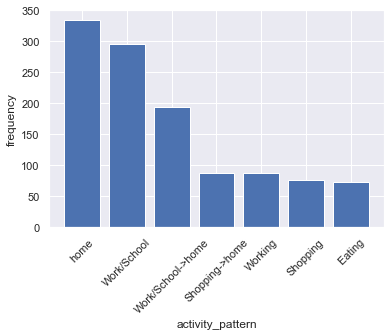

In [61]:
plot_TripChain(ModeChain_fromToyosu_toToyosu,n = 7)